100%|██████████| 4723/4723 [02:32<00:00, 30.95it/s]


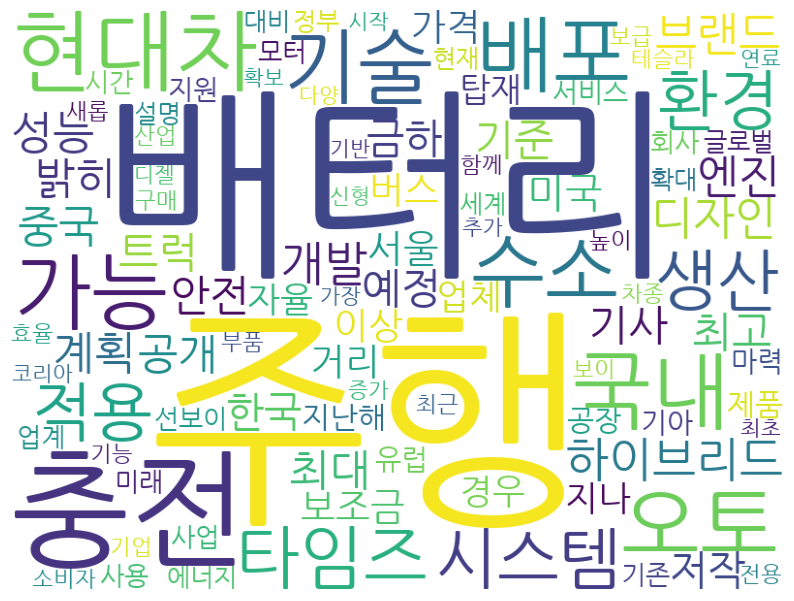

In [24]:
import ujson as json
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords
from collections import Counter
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt

with open("bobaedream_news.json", "r", encoding='utf-8') as f:
    news_list = json.load(f)

kiwi = Kiwi()
stopwords = Stopwords()

custom_stopwords = {
    ("기자", "NNG"), ("연합뉴스", "NNP"), ("제공", "NNG"), ("뉴스", "NNG"),
    ("사진", "NNG"), ("특파원", "NNG"), ("시장", "NNG"), ("지난", "NNG"),
    ("위해", "NNG"), ("통해", "NNG"), ("대한", "NNG"), ("관련", "NNG"),
    ("이번", "NNG"), ("매년", "NNG"), ("올해", "NNG"), ("작년", "NNG"),
    ("내년", "NNG"), ("재판매", "NNG"), ("및", "MAG"), ("DB", "SL"),
    ("금지", "NNG"), ("출처", "NNG"), ("저작권자", "NNG"), ("무단", "NNG"),
    ("전재", "NNG"), ("전기", "NNG"), ("판매", "NNG"), ("재배포", "NNG"),
    ("학습", "NNG"), ("활용", "NNG"), ("모델", "NNG"), ("출시", "NNG"), 
    ("자동차", "NNG"), ("차량", "NNG"), ("AI", "SL")    
}
stopwords.add(custom_stopwords)

counter = Counter()

for news in tqdm(news_list, mininterval=1):
    body_text = news["content"].strip()
    if len(body_text) < 10:
        continue
        
    tokens = kiwi.tokenize(body_text)
    for token in tokens:
        if token.tag.startswith('N') or token.tag.startswith('V') or token.tag.startswith('MA'):
            if (token.form, token.tag) not in stopwords and len(token.form) > 1:
                counter[token.form] += 1

wc = WordCloud(
    width=800,
    height=600,
    font_path="C:\\Users\\USER\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf",
    prefer_horizontal=1.0,
    background_color="white",
)
cloud = wc.generate_from_frequencies(dict(counter.most_common(100)))

plt.figure(figsize=(10, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()